In [2]:
from IPython.display import FileLink

In [3]:
!pwd

/home/armanda/N-project/nbs/HB


In [4]:
!head ../data/HB_Noxide.csv

head: cannot open `../data/HB_Noxide.csv' for reading: No such file or directory


In [3]:
%load_ext rpy2.ipython

In [7]:
%%R
library(dplyr)
library(ggplot2)
library(tidyr)

In [32]:
%%R
df = read.csv("../data/HB_Noxide.csv") %>%
    gather(Gene.ID, count, 
           -Sample.Name, 
           -Sequence.Read.Depth,
           -Treatment,
           -Elevation,
           -Depth) %>%
    mutate(relative.count = count / Sequence.Read.Depth * 1000000)

df$Elevation = factor(df$Elevation, levels = c("Spruce Fir", "High", "Low"))

df %>% head

  Sample.Name Sequence.Read.Depth Treatment Elevation   Depth Gene.ID count
1        CJ01            18702778        Ca      High Mineral     Nap    33
2        CJ02            17933988        Ca      High    Oa/A     Nap    58
3        CJ03            19823652        Ca      High   Oi/Oe     Nap    72
4        CJ04            21061458        Ca       Low Mineral     Nap    29
5        CJ05            23506722        Ca       Low    Oa/A     Nap    40
6        CJ06            22695072        Ca       Low   Oi/Oe     Nap    41
  relative.count
1       1.764444
2       3.234083
3       3.632025
4       1.376923
5       1.701641
6       1.806560


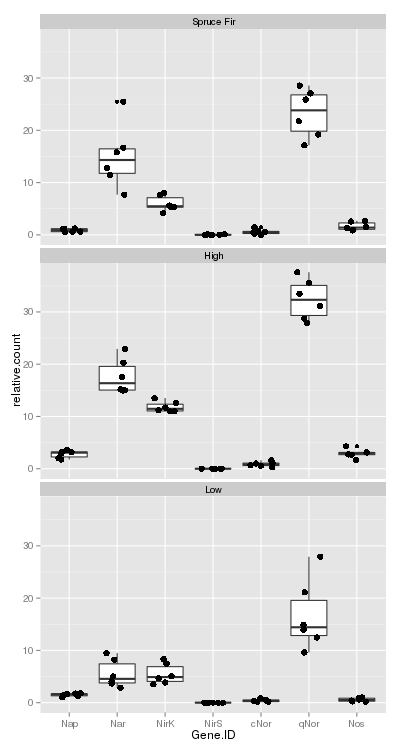

In [33]:
%%R -w 400 -h 750
p = ggplot(df, aes(x = Gene.ID, y = relative.count))

p = p + facet_wrap(~Elevation, ncol = 1)

p = p + geom_boxplot()

p = p + geom_point(size = 3, position = position_jitter(w = 0.25, h = 0))

p

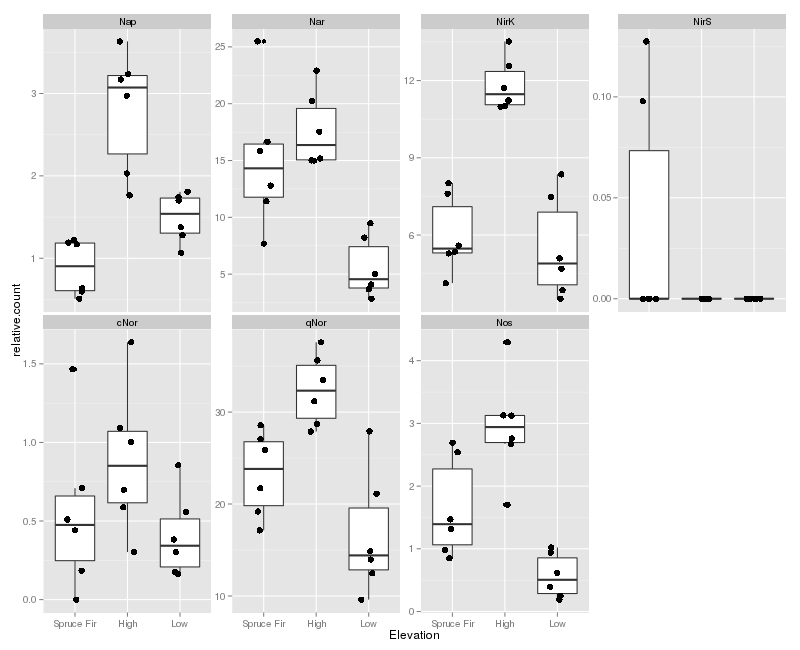

In [42]:
%%R -w 800 -h 650
p = ggplot(df, aes(x = Elevation, y = relative.count))

p = p + facet_wrap(~Gene.ID, scales = "free_y", ncol = 4)

p = p + geom_boxplot()

p = p + geom_point(size = 3, position = position_jitter(w = 0.15, h = 0))

p

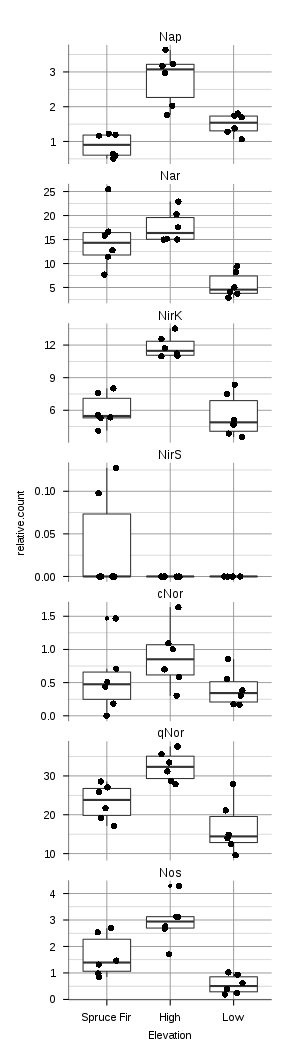

In [77]:
%%R -w 300 -h 1050
p = ggplot(df, aes(x = Elevation, y = relative.count))

p = p + facet_wrap(~Gene.ID, scales = "free_y", ncol = 1)

p = p + geom_boxplot()

p = p + geom_point(size = 3, position = position_jitter(w = 0.15, h = 0))

p = p + theme_agile()

p

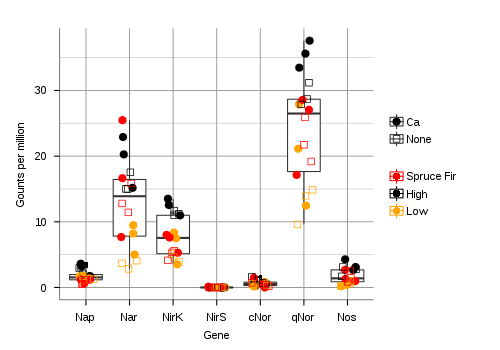

In [79]:
%%R -w 500 -h 350
p = ggplot(df, aes(x = Gene.ID, y = relative.count, color = Elevation, shape = Treatment))

p = p + geom_boxplot(aes(group = Gene.ID))

p = p + geom_point(size = 3.5, position = position_jitter(w = 0.20, h = 0))

p = p + scale_color_manual(values = c("red", "black", "orange"))

p = p + scale_shape_manual(values = c(19, 22))
p = p + theme_agile()

p = p + labs(y = "Gounts per million", x= "Gene")

p = p + theme(axis.title = element_text(size = 20))

ggsave("../figs/abundVgene.svg", p, h = 5, w = 8)

p

In [5]:
### normalize by total denitrification gene counts

In [80]:
FileLink("../figs/abundVgene.svg")

/home/armanda/N-project/figs/abundVgene.svg

In [71]:
%%R
theme_agile <- function(base_size = 11, base_family = "Arial", plot_type = "formal", lines_lwd = 0.25, ticks_type = "outer", plot_grid = TRUE, axis_font = base_family, title_size = base_size*1.2, legend_size = base_size,
												bg_col = ifelse(plot_type == "formal", "white", "#F0F0F0"), title_font = base_family , base_col  = "black", axis_lines = TRUE,
												minor_grid = ifelse(plot_grid, TRUE, FALSE), vert_grid = ifelse(plot_grid, TRUE, FALSE), ticks_length = ifelse(ticks_type == "outer", 0.2, -0.2), horz_grid = ifelse(plot_grid, TRUE, FALSE), alpha_leg = 0.1, bord_size = 0,
												legend_bg = ifelse(plot_type == "formal", "white", "#F0F0F0"), strip_bg = ifelse(plot_type == "formal", "white", "khaki1"), grid_thick = 1){
	theme_bw()+
		ggplot2::theme(
			plot.margin = grid::unit(c(1, 1, .5, .7), "cm"),
			text = ggplot2::element_text(family = base_family, size = base_size),
			axis.line =  element_line(size = ifelse(axis_lines, grid::unit(lines_lwd, "mm"),0), color = "black"),
			axis.ticks.length = grid::unit(ticks_length, "cm"),
			axis.ticks.margin = grid::unit(ifelse(ticks_length > 0,0.25, -ticks_length + 0.25) , "cm"),
			axis.text.x = ggplot2::element_text(size = base_size, colour = base_col , family = axis_font),
			axis.text.y = ggplot2::element_text(size = base_size, colour = base_col , family = axis_font),
			axis.title.y = ggplot2::element_text(size =  base_size, colour = base_col , vjust = 1.5, family = axis_font),
			axis.title.x = ggplot2::element_text(size = base_size,colour = base_col ,vjust = -.5, family = axis_font),
			panel.background = ggplot2::element_rect(fill = bg_col),
			plot.background = ggplot2::element_rect(fill = bg_col),
			panel.border = ggplot2::element_rect(colour = "black", fill=NA, size = bord_size),
			panel.grid.major.x = ggplot2::element_line(colour = ifelse(vert_grid, "grey60",bg_col), size = ifelse(vert_grid,0.45 * grid_thick, 0)),
			panel.grid.minor.x = ggplot2::element_line(colour = ifelse(vert_grid, ifelse(minor_grid, "grey80",bg_col),bg_col), size = ifelse(vert_grid,0.35* grid_thick, 0)),
			panel.grid.major.y = ggplot2::element_line(colour = ifelse(horz_grid, "grey60",bg_col), size = ifelse(horz_grid,0.45* grid_thick, 0)),
			panel.grid.minor.y = ggplot2::element_line(colour = ifelse(horz_grid, ifelse(minor_grid, "grey80",bg_col),bg_col), size = ifelse(horz_grid,0.35* grid_thick, 0)),
			panel.grid.major = ggplot2::element_line(colour = "grey40", size=0.45),
			plot.title = ggplot2::element_text(face="bold",hjust = ifelse(plot_type == "formal", 0.5, 0) ,vjust = 2, colour = base_col , size = title_size, family = title_font),
			legend.background = ggplot2::element_rect(fill = scales::alpha(legend_bg, alpha_leg)), legend.key = ggplot2::element_blank(),
			legend.text = ggplot2::element_text(size = legend_size),
			legend.title = element_blank(),
			strip.background =  ggplot2::element_rect(colour = strip_bg, fill = strip_bg),
			strip.text.x = ggplot2::element_text(size = base_size + 1),
			strip.text.y = ggplot2::element_text(size = base_size + 1)
		)
}